# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

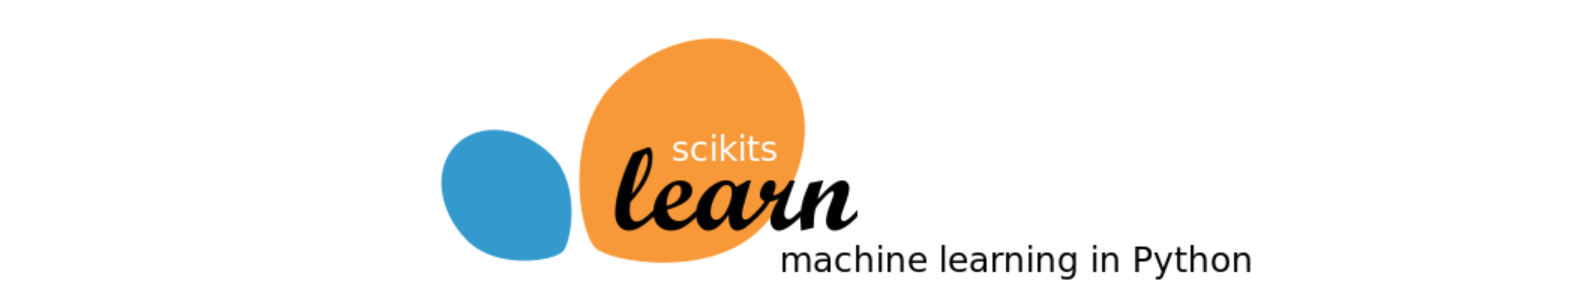

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from file1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('file1.csv',names=['A','B','C','D','E','F','G','H','I','J'])
df.head()

A  B  C  D  E   F  G  H  I  J
0  5  1  1  1  2   1  3  1  1  2
1  5  4  4  5  7  10  3  2  1  2
2  3  1  1  1  2   2  3  1  1  2
3  6  8  8  1  3   4  3  7  1  2
4  4  1  1  3  2   1  3  1  1  2

In [3]:
df.shape

(699, 10)

In [4]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
dtype: int64

In [5]:
df.dtypes

A     int64
B     int64
C     int64
D     int64
E     int64
F    object
G     int64
H     int64
I     int64
J     int64
dtype: object

In [6]:
df=df.drop(['C','D','E','F','G','H','I','J'],axis=1)
df.head()

A  B
0  5  1
1  5  4
2  3  1
3  6  8
4  4  1

In [7]:
# Elbow method 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['A','B']])
    sse.append(km.inertia_)

C:\Users\97517\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


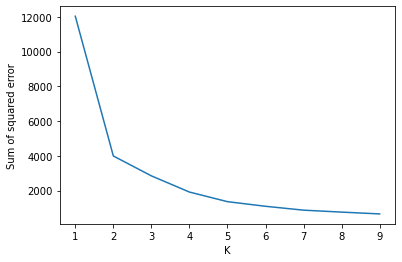

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
#silhouette_score
from sklearn.metrics import silhouette_score
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sil_score.append(silhouette_score(df,km.labels_))

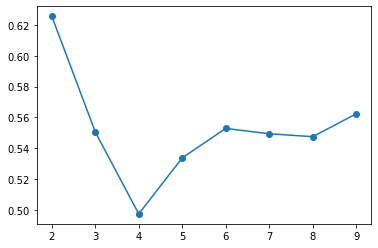

In [10]:
plt.plot(K,sil_score,'-o')

In [11]:
#After plotting both Elbow and Silhouetee grpahs it is clear that the best value of K=2.

In [12]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['A','B']])
y_predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [13]:
df['cluster']=y_predicted
df.head()

A  B  cluster
0  5  1        0
1  5  4        0
2  3  1        0
3  6  8        1
4  4  1        0

In [14]:
km.cluster_centers_

array([[3.0203252 , 1.43495935],
       [7.73913043, 7.17391304]])

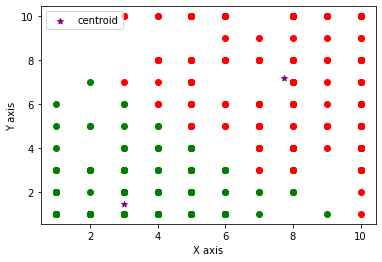

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.A,df1.B,color='green')
plt.scatter(df2.A,df2.B,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

# Part B

### INSTRUCTIONS
1. Read data from file2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [16]:
df = pd.read_csv('file2.csv',names=['x','y'])
df.head()

x         y
0 -0.999326  1.748467
1  1.557994  0.255070
2 -0.955949  1.675355
3 -1.204858  0.037380
4 -0.612919 -0.390663

In [17]:
df.shape

(100, 2)

In [18]:
df.isna().sum()

x    0
y    0
dtype: int64

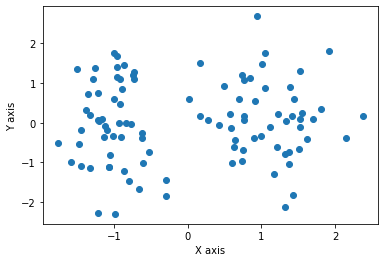

In [19]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [20]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(df)
distances,indices=nbrs.kneighbors(df)

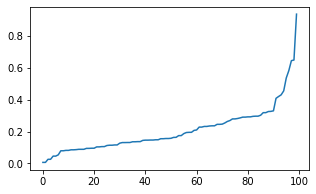

In [21]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.7, min_samples = 5).fit(df) 
labels = dbscan.labels_

In [23]:
labels

array([ 0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,
        1, -1,  1,  0,  0,  1,  0, -1,  0,  1,  0,  1,  0,  1,  1,  1,  1,
        0,  1, -1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,
        0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,
        0,  0,  1,  1,  0,  0,  0, -1,  0,  0,  1,  0,  1,  0,  1,  1,  0,
        1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0],
      dtype=int64)

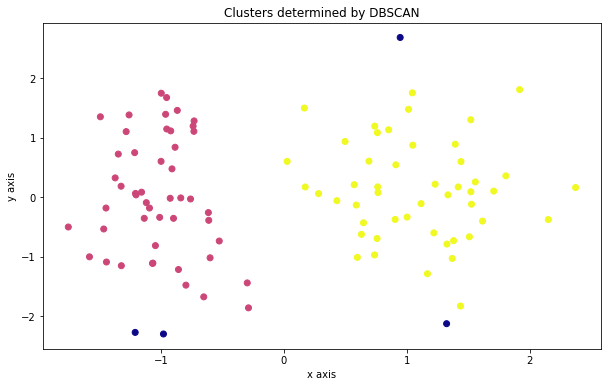

In [24]:
# Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'], c = labels, cmap = 'plasma') # plotting the clusters
plt.xlabel('x axis') # X-axis label
plt.ylabel('y axis') # Y-axis label
plt.title("Clusters determined by DBSCAN")
plt.show() # showing the plot

In [25]:
noise = dbscan.labels_[dbscan.labels_ == -1].size
print("Noise:", noise)

Noise: 4


In [26]:
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters: ", clusters)

Clusters:  2


In [27]:
from sklearn.metrics import silhouette_score

In [28]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sil_score.append(silhouette_score(df,km.labels_))

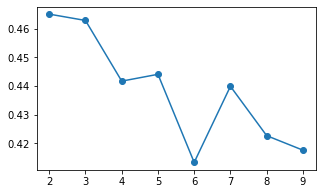

In [30]:
plt.plot(K,sil_score,'-o')

In [31]:
sil_score

[0.46513403848748863,
 0.46291715225731955,
 0.44170847782780426,
 0.4440931885113404,
 0.4132974416167787,
 0.43989639661284846,
 0.4226469860547954,
 0.4175727833805636]

# Part C

### INSTRUCTIONS:

1. Read data from file3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [32]:
df = pd.read_csv('file3.csv',names=['x','y'])
df.head()

x         y
0  5.464028 -6.377369
1 -0.626877  0.307585
2 -0.574917 -2.120564
3 -1.282412  0.106262
4  4.502644 -5.152151

In [33]:
df.shape

(100, 2)

In [34]:
df.isna().sum()

x    0
y    0
dtype: int64

In [35]:
#Kmean
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([0, 3, 3, 3, 2, 2, 3, 0, 3, 0, 0, 1, 2, 1, 0, 3, 0, 0, 0, 3, 0, 0,
       2, 1, 3, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 3, 3, 1, 0, 2, 1, 1, 3,
       1, 2, 1, 1, 2, 3, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0])

In [36]:
df['cluster']=y_predicted
df.head()

x         y  cluster
0  5.464028 -6.377369        0
1 -0.626877  0.307585        3
2 -0.574917 -2.120564        3
3 -1.282412  0.106262        3
4  4.502644 -5.152151        2

In [37]:
km.cluster_centers_

array([[ 5.86400715, -6.74517412],
       [-2.74116845, -0.42001313],
       [ 3.49713387, -6.41461402],
       [-0.70670948, -0.29915472]])

In [38]:
centroids_= pd.DataFrame(data=km.cluster_centers_, columns =['X', 'Y'])
centroids_

X         Y
0  5.864007 -6.745174
1 -2.741168 -0.420013
2  3.497134 -6.414614
3 -0.706709 -0.299155

No handles with labels found to put in legend.


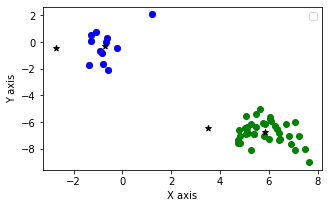

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df2 = df[df.cluster==2]
df2 = df[df.cluster==3]
plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='red')
plt.scatter(df2.x,df2.y,color='yellow')
plt.scatter(df2.x,df2.y,color='blue')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.scatter(centroids_.X,centroids_.Y,color='black', marker = "*")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

In [40]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(df) 
labels = dbscan.labels_

In [41]:
labels

array([ 0,  1,  1,  1,  2, -1,  1,  0,  1,  0,  0,  3,  2,  3,  0, -1,  0,
        0,  0,  1,  0,  0, -1,  3,  1,  3,  3,  2,  2,  2,  0,  3,  0,  0,
        0,  2,  1,  1,  3,  0, -1,  3,  3,  1,  3,  2,  3,  3,  2,  1,  0,
        0,  0,  2,  2,  3,  3,  0,  0,  2,  0,  0,  2,  2,  3,  0,  0,  0,
        0, -1,  0,  2, -1,  0,  3,  0,  2,  3,  3,  0,  2,  0,  3,  3,  2,
        2,  2,  2,  2,  2,  3,  0,  2,  0,  0,  2,  0,  0,  3,  0],
      dtype=int64)

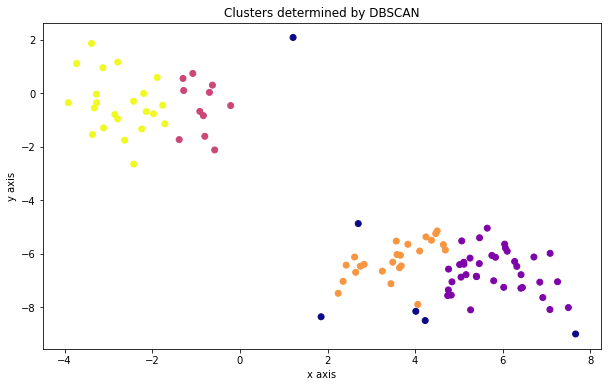

In [42]:
# Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'], c = labels, cmap = 'plasma') # plotting the clusters
plt.xlabel('x axis') # X-axis label
plt.ylabel('y axis') # Y-axis label
plt.title("Clusters determined by DBSCAN")
plt.show() # showing the plot

In [43]:
noise = dbscan.labels_[dbscan.labels_ == -1].size
print("Noise:", noise)

Noise: 6


In [44]:
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters: ", clusters)

Clusters:  4


In [ ]:
#DBscan is more suitable because data contains noise. where as KMean Algorithm cannot handle noise.